In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

y = digits.target.copy() #为了防止修改原数据
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/Users/bessie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
dmin = np.min(decision_scores)
dmax = np.max(decision_scores)

In [8]:
thresholds = np.arange(dmin, dmax, 0.01) #每0.01为一个步长

In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = []
recall = []

for t in thresholds:
    y_predict = np.array(decision_scores >= t, dtype = 'int')
    p = precision_score(y_test, y_predict)
    precision.append(p)
    r = recall_score(y_test, y_predict)
    recall.append(r)
    

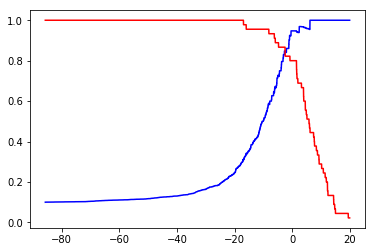

In [15]:
plt.plot(thresholds, precision, color = 'b')
plt.plot(thresholds, recall, color = 'r')
plt.show()

### Precision-Recall Curve
1. 随着precision的增大， recall是逐渐减小的
2. 在precision <= 0.9 时候，recall下降不明显
3. 在precision > 0.9 时候，recall下降非常明显

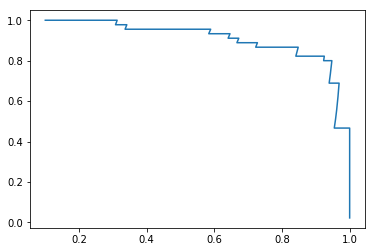

In [17]:
plt.plot(precision, recall)
plt.show()

### sklearn自带绘制precision_recall_curve，其中的步长是根据我们数据大小决定的

In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores) 

In [20]:
precisions.shape

(145,)

In [21]:
recalls.shape

(145,)

In [22]:
thresholds.shape

(144,)

#### 绘制的时候，需要抛去最后一个值，因为thresholds比precisions和recalls都少一个值
1. sklearn 根据他的算法，给出了他觉得有意义的thresholds的范围
2. 而我们的算法，是考虑了全部范围从min到max：thresholds = np.arange(dmin, dmax, 0.01) #每0.01为一个步长

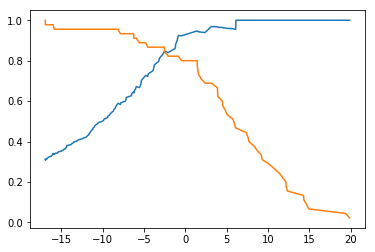

In [23]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

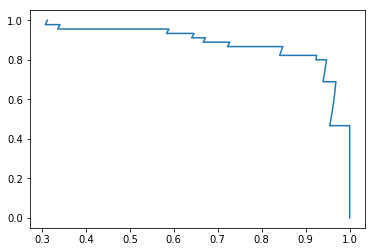

In [25]:
plt.plot(precisions, recalls)
plt.show()